<a href="https://colab.research.google.com/github/NosenkoArtem/MADMO-advanced-/blob/master/%22%5Bhw%5DGradientBoostingTask2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Speed and Performance of GB libraries

Please make sure to install the following powerful packages for boosting:
* [xgboost](https://anaconda.org/conda-forge/xgboost)
* [lightgbm](https://anaconda.org/conda-forge/lightgbm)
* [catboost](https://tech.yandex.com/catboost/doc/dg/concepts/python-installation-docpage/)

In this task you are asked to compare the **training time** of the **GBDT**, the
Gradient Boosted Decision Trees, as implemeted by different popular ML libraries.
The dataset you shall use is the [UCI Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).
You should study the parameters of each library and establish the **correspondence**
between them.

The plan is as follows:
1. Take the **default** parameter settings, measure the training time, and plot
the ROC curves;
2. Use grid search with the $3$-fold cross valiadation to choose the best model.
Then measure the training time as a function of (separately) **tree depth** and **the
number of estimators in the ensemble**, finally **plot the ROC** curves of the best
models.

You need to make sure that you are comparing **comparable** classifiers, i.e. with
**the same tree and ensemble hyperparameters**.

<span style="color:green">**NOTE**</span> You need figure out how to make parameter settings
compatible. One possible way to understand the correspondence is to study the docs. You may
choose the default parameters from any library.

Please plot **three** ROC curves, one per library, on the same **one plot**
with a *comprehensible [legend](https://matplotlib.org/users/legend_guide.html)*.

A useful command for timing is IPython's [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). 

In [ ]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=42)

In [ ]:
! pip install catboost

In [ ]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [ ]:
# LGBM с гиперапарметрами по умолчанию
%%timeit
lgbm_clf = LGBMClassifier(n_estimators=100)
lgbm_clf.fit(X_train, y_train)
y_pred_proba_lgbm = lgbm_clf.predict_proba(X_test)[:, 1]

10 loops, best of 3: 85.1 ms per loop


In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=100)
lgbm_clf.fit(X_train, y_train)
y_pred_proba_lgbm = lgbm_clf.predict_proba(X_test)[:, 1]
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_pred_proba_lgbm, pos_label=1)
print('ROC-AUC_score : {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_lgbm)))

ROC-AUC_score : 0.99


In [ ]:
# XGboost с гиперапарметрами по умолчанию
%%timeit
xgboost_clf = XGBClassifier(n_estimators=100)
xgboost_clf.fit(X_train, y_train)
y_pred_proba_xgboost = xgboost_clf.predict_proba(X_test)[:, 1]

1 loop, best of 3: 72.5 ms per loop


In [ ]:
xgboost_clf = XGBClassifier(n_estimators=100)
xgboost_clf.fit(X_train, y_train)
y_pred_proba_xgboost = xgboost_clf.predict_proba(X_test)[:, 1]
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(y_test, y_pred_proba_lgbm, pos_label=1)
print('ROC-AUC_score : {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_xgboost)))

ROC-AUC_score : 1.00


In [ ]:
# CatBoost с гиперапарметрами по умолчанию
%%timeit
catboost_clf = CatBoostClassifier(iterations=100,
                                  verbose=False)
catboost_clf.fit(X_train, y_train)
y_pred_proba_catboost = catboost_clf.predict_proba(X_test)[:, 1]

1 loop, best of 3: 830 ms per loop


In [ ]:
catboost_clf = CatBoostClassifier(iterations=100, verbose=False)
catboost_clf.fit(X_train, y_train)
y_pred_proba_catboost = catboost_clf.predict_proba(X_test)[:, 1]
fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, y_pred_proba_lgbm, pos_label=1)
print('ROC-AUC_score : {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_catboost)))

ROC-AUC_score : 1.00


In [ ]:
# CatBoost с гиперапарметрами по умолчанию, но на GPU
%%timeit
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
if device.type == 'cuda':
  catboost_clf = CatBoostClassifier(iterations=100,
                                     verbose=False, 
                                     task_type='GPU')
  
  catboost_clf.fit(X_train, y_train)
  y_pred_proba_catboost = catboost_clf.predict_proba(X_test)[:, 1]

1 loop, best of 3: 1.9 s per loop


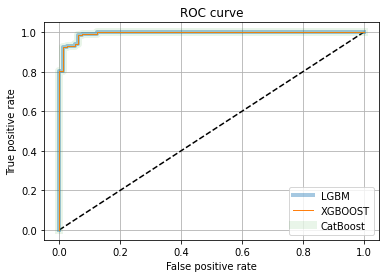

In [ ]:
# построение ROC-кривой
plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lgbm, tpr_lgbm, label='LGBM', linewidth=4, alpha=0.4)
plt.plot(fpr_xgboost, tpr_xgboost, label='XGBOOST', linewidth=1)
plt.plot(fpr_catboost, tpr_catboost, label='CatBoost', linewidth=8, alpha=0.1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

По-видимому XGBoost быстрее своих "собратьев". При этом дает такое же качество, потому что данные весьма "простые". Тренировка CatBoost на GPU не дает преимущества.

In [ ]:
# игрушечный пример c другими данными
X, y = make_classification(n_samples=5000, n_features=120,
                          n_informative=35, flip_y=0.35, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=42)

In [ ]:
# LGBM с гиперапарметрами по умолчанию
%%timeit
lgbm_clf = LGBMClassifier(n_estimators=100)
lgbm_clf.fit(X_train, y_train)
y_pred_proba_lgbm = lgbm_clf.predict_proba(X_test)[:, 1]

1 loop, best of 3: 2.86 s per loop


In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=100)
lgbm_clf.fit(X_train, y_train)
y_pred_proba_lgbm = lgbm_clf.predict_proba(X_test)[:, 1]
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_pred_proba_lgbm, pos_label=1)
print('ROC-AUC_score : {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_lgbm)))

ROC-AUC_score : 0.78


In [ ]:
# XGboost с гиперапарметрами по умолчанию
%%timeit
xgboost_clf = XGBClassifier(n_estimators=100)
xgboost_clf.fit(X_train, y_train)
y_pred_proba_xgboost = xgboost_clf.predict_proba(X_test)[:, 1]

1 loop, best of 3: 2.24 s per loop


In [ ]:
xgboost_clf = XGBClassifier(n_estimators=100)
xgboost_clf.fit(X_train, y_train)
y_pred_proba_xgboost = xgboost_clf.predict_proba(X_test)[:, 1]
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(y_test, y_pred_proba_xgboost, pos_label=1)
print('ROC-AUC_score : {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_xgboost)))

ROC-AUC_score : 0.78


In [ ]:
# CatBoost с гиперапарметрами по умолчанию
%%timeit
catboost_clf = CatBoostClassifier(iterations=100,
                                  verbose=False)
catboost_clf.fit(X_train, y_train)
y_pred_proba_catboost = catboost_clf.predict_proba(X_test)[:, 1]

1 loop, best of 3: 3.61 s per loop


In [ ]:
catboost_clf = CatBoostClassifier(iterations=100, verbose=False)
catboost_clf.fit(X_train, y_train)
y_pred_proba_catboost = catboost_clf.predict_proba(X_test)[:, 1]
fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, y_pred_proba_catboost, pos_label=1)
print('ROC-AUC_score : {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_catboost)))

ROC-AUC_score : 0.78


In [ ]:
# CatBoost с гиперапарметрами по умолчанию, но на GPU
%%timeit
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
if device.type == 'cuda':
  catboost_clf = CatBoostClassifier(iterations=100,
                                     verbose=False, 
                                     task_type='GPU')
  
  catboost_clf.fit(X_train, y_train)
  y_pred_proba_catboost = catboost_clf.predict_proba(X_test)[:, 1]

1 loop, best of 3: 2.3 s per loop


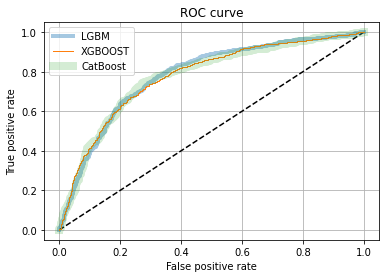

In [ ]:
# построение ROC-кривой
plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lgbm, tpr_lgbm, label='LGBM', linewidth=4, alpha=0.4)
plt.plot(fpr_xgboost, tpr_xgboost, label='XGBOOST', linewidth=1)
plt.plot(fpr_catboost, tpr_catboost, label='CatBoost', linewidth=8, alpha=0.2)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

Тут уже видны премущества, как по времени так и по качеству CatBoost и LGBM. CatBoost на GPU работает на GPU в среднем побыстрее LGBM. Качество для CatBoost и LGBM выше, чем у XGBoost

#### <center> Добавим подбор гиперпараметров на кросс-валидации <center> 

---








In [ ]:
# для LGBM
lgbm_clf = LGBMClassifier()
params = {'n_estimators' : np.arange(10, 400, 20),
          'max_depth' : np.arange(2, 8, 1)
}
gs_lgbm = GridSearchCV(estimator=lgbm_clf, param_grid=params, 
                       scoring='roc_auc', cv=3)
gs_lgbm.fit(X_train, y_train)
best_lgbm_clf = gs_lgbm.best_estimator_
print('Best_score : {:.2f}'.format(gs_lgbm.best_score_))
y_pred_proba_lgbm = best_lgbm_clf.predict_proba(X_test)[:, 1]
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_pred_proba_lgbm, pos_label=1)
print('Score on test : {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_lgbm)))   

Best_score : 0.77
Score on test : 0.79


In [ ]:
# для XGBoost
xgboost_clf = XGBClassifier()
params = {'n_estimators' : np.arange(10, 400, 20),
          'max_depth' : np.arange(2, 8, 1)
}
gs_xgboost = GridSearchCV(estimator=xgboost_clf, param_grid=params, 
                          scoring='roc_auc', cv=3)
gs_xgboost.fit(X_train, y_train)
best_xgboost_clf = gs_xgboost.best_estimator_
print('Best_score : {:.2f}'.format(gs_xgboost.best_score_))
y_pred_proba_xgboost = best_xgboost_clf.predict_proba(X_test)[:, 1]
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(y_test, y_pred_proba_xgboost, pos_label=1)
print('Score on test : {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_xgboost)))   

Best_score : 0.78
Score on test : 0.78


In [ ]:
# для CatBoost
catboost_clf = CatBoostClassifier(task_type='GPU', verbose=False)
params = {'iterations' : np.arange(10, 400, 20),
          'max_depth' : np.arange(2, 8, 1)
}
gs_catboost = GridSearchCV(estimator=catboost_clf, param_grid=params, 
                          scoring='roc_auc', cv=3)
gs_catboost.fit(X_train, y_train)
best_catboost_clf = gs_catboost.best_estimator_
print('Best_score : {:.2f}'.format(gs_catboost.best_score_))
y_pred_proba_catboost = best_catboost_clf.predict_proba(X_test)[:, 1]
fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, y_pred_proba_catboost, pos_label=1)
print('Score on test : {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_catboost)))  

Best_score : 0.78
Score on test : 0.78


In [ ]:
# посмотрим на гиперпараметры, подобранные для каждого алгоритма
print('Best LGBM classifier : ', best_lgbm_clf)
print('Best XGBOOST classifier : ', best_xgboost_clf)
print('Best CatBoost classifier : n_estimators {}, max_depth {}'.format(best_catboost_clf.tree_count_, best_catboost_clf.get_all_params()['depth']))

Best LGBM classifier :  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=390, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Best XGBOOST classifier :  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=330, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Best CatBoost classif

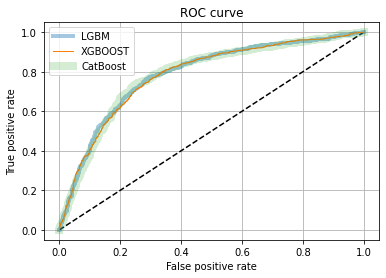

In [ ]:
# построение ROC-кривой
plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lgbm, tpr_lgbm, label='LGBM', linewidth=4, alpha=0.4)
plt.plot(fpr_xgboost, tpr_xgboost, label='XGBOOST', linewidth=1)
plt.plot(fpr_catboost, tpr_catboost, label='CatBoost', linewidth=8, alpha=0.2)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

После подбора гиперпараметров алгоримы дают примерно одинаковое качество
